### 8.2 Tensorflow and Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

2024-12-06 23:10:26.105295: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 23:10:26.302704: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733497826.380023    4268 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733497826.404106    4268 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 23:10:26.589369: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
from tensorflow.keras.preprocessing.image import load_img

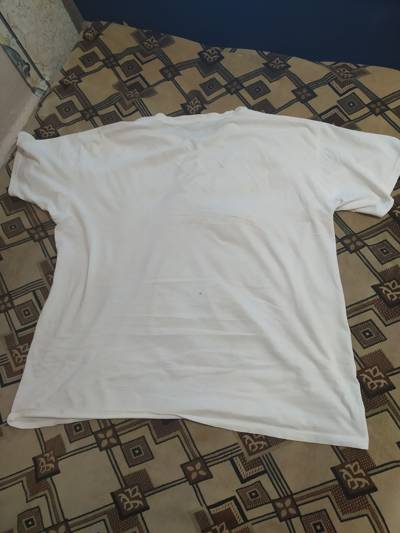

In [4]:
path = './clothing-dataset-small/train/t-shirt'
name = '0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [5]:
img = load_img(fullname, target_size=(299, 299))

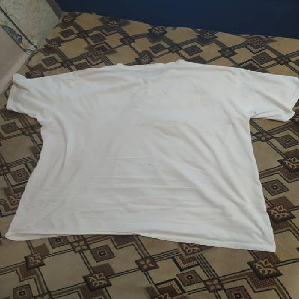

In [6]:
img

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

In [8]:
x

array([[[ 99,  99,  87],
        [116, 116, 104],
        [114, 114, 102],
        ...,
        [ 23,  30,  46],
        [ 23,  30,  46],
        [ 22,  29,  45]],

       [[106, 106,  94],
        [120, 120, 108],
        [122, 122, 110],
        ...,
        [ 24,  31,  47],
        [ 23,  30,  46],
        [ 23,  30,  46]],

       [[118, 118, 106],
        [125, 125, 113],
        [130, 130, 118],
        ...,
        [ 25,  32,  48],
        [ 24,  31,  47],
        [ 24,  31,  47]],

       ...,

       [[ 79,  72,  53],
        [ 82,  75,  57],
        [ 84,  77,  59],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 115,  93]],

       [[ 86,  79,  60],
        [ 85,  78,  60],
        [ 83,  76,  58],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]],

       [[ 76,  69,  50],
        [ 69,  62,  44],
        [ 64,  57,  39],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]]

The image has the datayype uint8. 'u' means unsigned. Which means that the values are between 0 and 255. And int8 means it takes 8bits or 1 byte.

### 8.3 Pre-trained Convolutional Neural Networks

image-net.org - contains dataset of images and other commonly used subsets for images

keras.io/api/applications/ - contains pre-trained models

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1733497828.808579    4268 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4231 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [11]:
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
X[0]

array([[[-0.2235294 , -0.2235294 , -0.31764704],
        [-0.09019607, -0.09019607, -0.18431371],
        [-0.10588235, -0.10588235, -0.19999999],
        ...,
        [-0.81960785, -0.7647059 , -0.6392157 ],
        [-0.81960785, -0.7647059 , -0.6392157 ],
        [-0.827451  , -0.77254903, -0.64705884]],

       [[-0.16862744, -0.16862744, -0.26274508],
        [-0.05882353, -0.05882353, -0.15294117],
        [-0.04313725, -0.04313725, -0.1372549 ],
        ...,
        [-0.8117647 , -0.75686276, -0.6313726 ],
        [-0.81960785, -0.7647059 , -0.6392157 ],
        [-0.81960785, -0.7647059 , -0.6392157 ]],

       [[-0.0745098 , -0.0745098 , -0.16862744],
        [-0.01960784, -0.01960784, -0.11372548],
        [ 0.0196079 ,  0.0196079 , -0.0745098 ],
        ...,
        [-0.8039216 , -0.7490196 , -0.62352943],
        [-0.8117647 , -0.75686276, -0.6313726 ],
        [-0.8117647 , -0.75686276, -0.6313726 ]],

       ...,

       [[-0.38039213, -0.4352941 , -0.58431375],
        [-0

In [15]:
pred = model.predict(X)

I0000 00:00:1733497831.089695    4868 service.cc:148] XLA service 0x7f823c003780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733497831.089890    4868 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-12-06 23:10:31.118905: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733497831.360464    4868 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-06 23:10:33.702742: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1733497834.231841    4868 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [16]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.9526401)),
  ('n04370456', 'sweatshirt', np.float32(0.009760026)),
  ('n04033995', 'quilt', np.float32(0.003174469)),
  ('n03710637', 'maillot', np.float32(0.0012294676)),
  ('n03188531', 'diaper', np.float32(0.0011785128))]]

In [17]:
pred.shape

(1, 1000)

In [18]:
pred

array([[7.92209266e-06, 2.29341149e-05, 1.85638455e-05, 1.21060302e-05,
        3.55526354e-05, 5.04396376e-05, 1.62474826e-05, 6.66064534e-06,
        1.18040516e-05, 8.65591664e-06, 1.63662025e-05, 9.83995596e-06,
        5.53209429e-06, 1.11219560e-05, 8.19871184e-06, 1.58362473e-05,
        2.06189161e-05, 7.27067800e-06, 1.09244629e-05, 1.35299406e-05,
        6.44589745e-05, 7.36716538e-06, 2.10518901e-05, 8.63634978e-06,
        1.72048603e-05, 2.21924147e-05, 1.01781261e-05, 1.47992032e-05,
        2.73888709e-05, 2.15671989e-05, 1.98430153e-05, 1.62405740e-05,
        1.79347389e-05, 3.21800217e-05, 3.57898134e-05, 2.96767448e-05,
        1.69016384e-05, 2.11803890e-05, 2.22338276e-05, 9.90219996e-06,
        5.81278755e-06, 3.34684410e-05, 1.10083274e-05, 1.24295375e-05,
        2.67433879e-05, 3.06453949e-05, 1.00951638e-05, 1.06622110e-05,
        1.49661710e-05, 2.61652676e-05, 3.30679868e-05, 1.40374168e-05,
        2.60186061e-05, 3.26023837e-05, 1.24906992e-05, 1.829114

Each of this number is the probability of the image belonging to a certain class.

### 8.4 Convolutional Neural Networks
- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

Convolutional layers are used to extract features from the image. 

Dense layers are used to classify the image.

### Convolutional Layers

##### Filters/Kernels 

The layer uses small matrices called filters or kernels that slide over the input image. Each filter is designed to detect specific features, such as edges, textures, or patterns.

##### Convolution Operation

The convolution operation involves sliding the filter over the image and computing the dot product between the filter and the image patch at each position. This results in a feature map that highlights the presence of the filter's features in the image.

##### Feature Maps

The output of the convolution operation is a feature map, which represents the presence of the filter's features in the image. Multiple filters can be applied to the same image, resulting in multiple feature maps. These feature maps are then combined and processed by subsequent layers to extract higher-level features and eventually classify the image.

##### Downsampling

Downsampling is the process of reducing the spatial dimensions of the feature maps, typically by using pooling layers. This helps in reducing the computational complexity and extracting the most important features.

### Dense Layers

##### Fully Connected
Each neuron in a dense layer receives input from all neurons in the previous layer, allowing it to learn complex patterns.

##### Weights and Biases
Each connection between neurons has an associated weight, and each neuron has a bias. During training, these weights and biases are adjusted to minimize the loss function.

##### Activation Function
An activation function is used to introduce nonlinearity into the network, allowing it to model more complex relationships between inputs and outputs. Common activation functions include ReLU, sigmoid, and tanh.

##### Output 
The output of a dense layer can be a single value (for regression tasks) or a vector of probabilities (for classification tasks).

##### Usage
Dense layers are commonly used in the final layers of a neural network to produce the final output, such as class probabilities in classification tasks.

### 8.5 Transfer Learning
- Is a type of layer in a neural network where each neuron is connected to every neuron in the previous layer. This layer is typically used in the final stages of a neural network to perform classification or regression tasks.



In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150, 150), 
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [21]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [22]:
X, y = next(train_ds)

In [23]:
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [24]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(150, 150), 
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [25]:
# inlcude_top=False means that the top layer (dense layer) of the model is not included.
# trainable=False means that the model is not trained on the data or when we train our model, we don't change the convolutional layers.

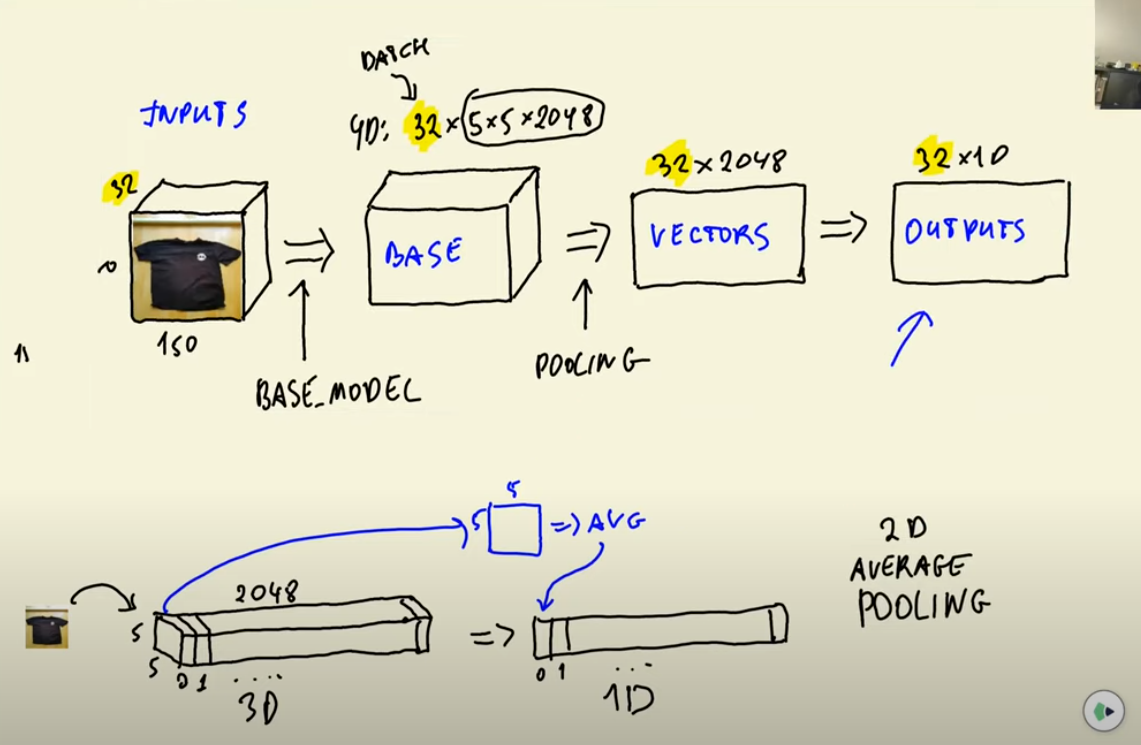

In [26]:
base_model = Xception(weights='imagenet', 
                      input_shape=(150, 150, 3), 
                      include_top=False
)

base_model.trainable = False

In [27]:
# we create a new top

In [28]:
# The result is currently in 3D in which what we need is a vector representation of the image.
# Called as 2D average pooling

'''inputs = keras.Input(shape=(150, 150, 3))'''  # Define the input layer with shape (150, 150, 3) for RGB images

'''base = base_model(inputs)'''  # Pass the inputs through the pre-trained base model (Xception)

'''outputs = base'''  # The output of the base model is assigned to outputs
'''model = keras.Model(inputs, outputs)'''  # Create a new Keras model with the defined inputs and outputs

# Pooling

inputs = keras.Input(shape=(150, 150, 3))  
base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)  # Apply global average pooling to the output of the base model to reduce the spatial dimensions and obtain a vector representation of the features

outputs = keras.layers.Dense(10)(vectors)  # Add a dense layer with 10 units for classification

model = keras.Model(inputs, outputs)  # Create a new Keras model with the defined inputs and outputs

In [29]:
preds = model.predict(X)

2024-12-06 23:10:36.500042: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1011', 92 bytes spill stores, 92 bytes spill loads

2024-12-06 23:10:36.590308: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1011', 384 bytes spill stores, 384 bytes spill loads

2024-12-06 23:10:39.966595: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [30]:
preds.shape

(32, 10)

In [31]:
# there are many optimizers to choose from in keras

In [32]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [33]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


/home/spoofiyy/ml-zoomcamp-tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/96 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4883 - loss: 1.9968

2024-12-06 23:10:48.089974: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3717', 344 bytes spill stores, 308 bytes spill loads

2024-12-06 23:10:48.118127: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3717', 112 bytes spill stores, 112 bytes spill loads

2024-12-06 23:10:51.364649: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.48GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5806 - loss: 1.6047

2024-12-06 23:10:58.245982: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1042', 112 bytes spill stores, 112 bytes spill loads

2024-12-06 23:10:58.270649: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1042', 196 bytes spill stores, 196 bytes spill loads

2024-12-06 23:11:00.794570: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.44GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - accuracy: 0.5815 - loss: 1.6011 - val_accuracy: 0.6774 - val_loss: 1.1460
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8259 - loss: 0.5395 - val_accuracy: 0.7126 - val_loss: 1.0904
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8743 - loss: 0.3593 - val_accuracy: 0.7889 - val_loss: 0.9815
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9173 - loss: 0.2317 - val_accuracy: 0.8123 - val_loss: 0.8798
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9450 - loss: 0.1346 - val_accuracy: 0.8182 - val_loss: 0.8440
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9471 - loss: 0.1551 - val_accuracy: 0.8035 - val_loss: 0.8877
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9816 - loss: 0.0604 - val_accuracy: 0.8240 - val_loss: 0.8271
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9741 - loss: 0.0730 - val_accuracy: 0.8123 - val_loss: 

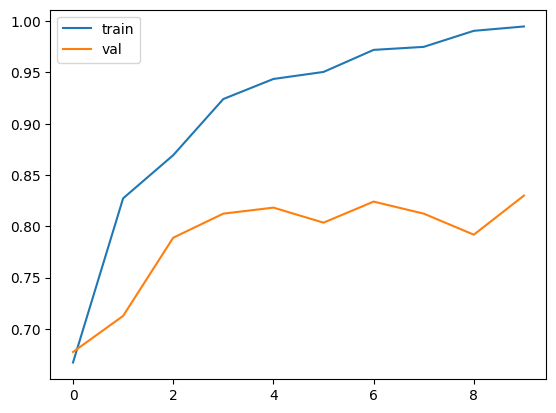

In [34]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()


- The training accuracy increases steadily and approaches 1.0 (or 100%) by the end of the training process. This indicates that the model is learning well from the training data.
- The gap between the training and validation accuracy indicates potential overfitting. The model is learning the training data too well, which may lead to poor performance on unseen data. This is evident as the training accuracy continues to rise while the validation accuracy stagnates.

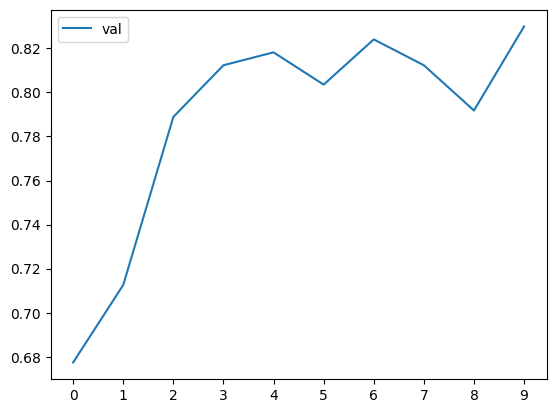

In [35]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

#### 8.6 Adjusting the Learning Rate

In [36]:
def make_model(learning_rate=0.01):
    base_model = Xception(weights='imagenet', 
        input_shape=(150, 150, 3), 
        include_top=False
    )

    base_model.trainable = False

    ##############################################################

    inputs = keras.Input(shape=(150, 150, 3))  
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)  
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    ##############################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model

In [37]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, validation_data=val_ds, epochs=10)
    scores[lr] = history.history

    print()
    print()


0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.1853 - loss: 2.3378 - val_accuracy: 0.4927 - val_loss: 1.6238
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5322 - loss: 1.5088 - val_accuracy: 0.6129 - val_loss: 1.2538
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6206 - loss: 1.2120 - val_accuracy: 0.6804 - val_loss: 1.0720
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6776 - loss: 1.0345 - val_accuracy: 0.7097 - val_loss: 0.9558
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7014 - loss: 0.9537 - val_accuracy: 0.7185 - val_loss: 0.8768
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7294 - loss: 0.8460 - val_accuracy: 0.7390 - val_loss: 0.8273
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7447 - loss: 0.7979 - val_accuracy: 0.7507 - val_loss: 0.7838
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7574 - loss: 0.7444 - val_accuracy: 0.

In [38]:
del scores[0.1]
del scores[0.0001]

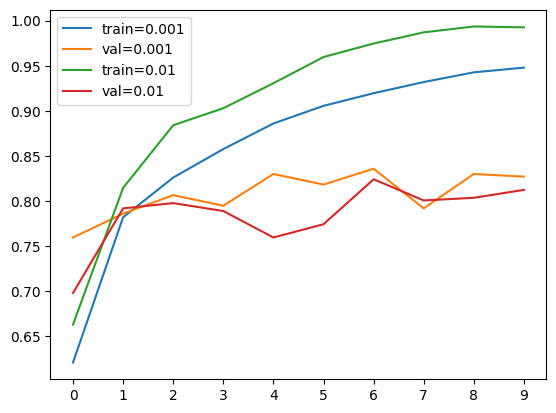

In [39]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

The learning rate of 0.001 is better in this case. It leads to a higher and more stable validation accuracy, indicating that the model is learning effectively without overfitting or oscillating too much.

In [40]:
learning_rate = 0.001

#### 8.7 Checkpointing
- Saving the best model only
- Training a model with callbacks

The purpose of this callback is to save the model's weights and architecture at the end of each epoch, allowing you to keep track of the best-performing model based on validation accuracy. This is particularly useful in scenarios where the model might overfit the training data, as you can later load the best model for evaluation or further training.

In [41]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    monitor='val_accuracy',
    mode='max'
)

In [42]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=10,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.5076 - loss: 1.4609 - val_accuracy: 0.7771 - val_loss: 0.7190
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.7792 - loss: 0.6562 - val_accuracy: 0.7977 - val_loss: 0.6298
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8357 - loss: 0.5264 - val_accuracy: 0.8094 - val_loss: 0.5827
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8682 - loss: 0.4283 - val_accuracy: 0.8299 - val_loss: 0.5683
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8896 - loss: 0.3724 - val_accuracy: 0.8094 - val_loss: 0.5565
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.9109 - loss: 0.3086 - val_accuracy: 0.8240 - val_loss: 0.5317
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9177 - loss: 0.2954 - val_accuracy: 0.8270 - val_loss: 0.5249
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9442 - loss: 0.2484 - val_accuracy: 0.8358 - 

#### 8.8 Adding more layers to the model
Adding new layers to the pre-trained model allows us to leverage the learned features, reduce the dimensionality, and adapt the model to our specific classification task. This approach, known as transfer learning, enables us to benefit from the knowledge gained by the pre-trained model while customizing it for our dataset.

In [43]:
# Activation Functions
# Output: Sigmoid and Softmax
# Intermediate: ReLU... etc

In [44]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(weights='imagenet', 
        input_shape=(150, 150, 3), 
        include_top=False
    )

    base_model.trainable = False

    ##############################################################

    inputs = keras.Input(shape=(150, 150, 3))  
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)  

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10,)(inner)
    model = keras.Model(inputs, outputs)

    ##############################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # we dont use softamx since we use from_logits=True

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model

In [45]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, validation_data=val_ds, epochs=10)
    scores[size] = history.history

    print()
    print()


10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.4034 - loss: 1.7586 - val_accuracy: 0.5836 - val_loss: 1.1716
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6192 - loss: 1.0881 - val_accuracy: 0.6950 - val_loss: 0.9168
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7471 - loss: 0.7899 - val_accuracy: 0.7449 - val_loss: 0.7801
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7883 - loss: 0.6236 - val_accuracy: 0.7683 - val_loss: 0.7108
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.8444 - loss: 0.5164 - val_accuracy: 0.7713 - val_loss: 0.6602
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8621 - loss: 0.4380 - val_accuracy: 0.7947 - val_loss: 0.6340
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8831 - loss: 0.3818 - val_accuracy: 0.7918 - val_loss: 0.6266
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9010 - loss: 0.3423 - val_accuracy: 0.7977

2024-12-06 23:17:07.103742: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3751', 192 bytes spill stores, 192 bytes spill loads



61/96 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5097 - loss: 1.4644

2024-12-06 23:17:12.203045: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3751', 16 bytes spill stores, 16 bytes spill loads

2024-12-06 23:17:12.473405: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3751', 164 bytes spill stores, 164 bytes spill loads



95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5620 - loss: 1.3086

2024-12-06 23:17:19.086535: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1044', 16 bytes spill stores, 16 bytes spill loads

2024-12-06 23:17:19.684131: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1044', 52 bytes spill stores, 52 bytes spill loads



96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.5643 - loss: 1.3015 - val_accuracy: 0.7801 - val_loss: 0.6301
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8306 - loss: 0.5156 - val_accuracy: 0.8240 - val_loss: 0.5551
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8839 - loss: 0.3476 - val_accuracy: 0.7947 - val_loss: 0.5922
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9191 - loss: 0.2638 - val_accuracy: 0.8152 - val_loss: 0.5540
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9520 - loss: 0.1865 - val_accuracy: 0.7977 - val_loss: 0.5912
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9654 - loss: 0.1359 - val_accuracy: 0.8035 - val_loss: 0.5890
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9854 - loss: 0.0942 - val_accuracy: 0.8328 - val_loss: 0.5722
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9934 - loss: 0.0591 - val_accuracy: 0.8152 - val_loss: 

2024-12-06 23:18:05.335344: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3751', 192 bytes spill stores, 192 bytes spill loads

2024-12-06 23:18:05.561363: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3758', 112 bytes spill stores, 112 bytes spill loads

2024-12-06 23:18:05.673910: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3758', 484 bytes spill stores, 484 bytes spill loads

2024-12-06 23:18:05.871436: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3751_0', 232 bytes spill stores, 232 bytes spill loads



25/96 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4852 - loss: 1.5406

2024-12-06 23:18:09.894059: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3751', 164 bytes spill stores, 164 bytes spill loads

2024-12-06 23:18:10.844667: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3751_0', 252 bytes spill stores, 252 bytes spill loads

2024-12-06 23:18:10.849198: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3751', 16 bytes spill stores, 16 bytes spill loads

2024-12-06 23:18:11.689180: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3758', 112 bytes spill stores, 112 bytes spill loads

2024-12-06 23:18:11.708356: I external/local_xla/xla

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6148 - loss: 1.1557

2024-12-06 23:18:19.518683: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1044_0', 240 bytes spill stores, 240 bytes spill loads

2024-12-06 23:18:19.929733: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1044', 52 bytes spill stores, 52 bytes spill loads

2024-12-06 23:18:20.131524: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1051', 112 bytes spill stores, 112 bytes spill loads

2024-12-06 23:18:20.282294: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1044', 16 bytes spill stores, 16 bytes spill loads

2024-12-06 23:18:20.322797: I external/local_xla/xla/s

96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - accuracy: 0.6156 - loss: 1.1531 - val_accuracy: 0.8006 - val_loss: 0.6053
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8578 - loss: 0.4107 - val_accuracy: 0.7830 - val_loss: 0.6529
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8982 - loss: 0.2824 - val_accuracy: 0.7771 - val_loss: 0.6622
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9449 - loss: 0.1676 - val_accuracy: 0.8211 - val_loss: 0.5816
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9800 - loss: 0.0878 - val_accuracy: 0.8270 - val_loss: 0.6058
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9910 - loss: 0.0430 - val_accuracy: 0.8035 - val_loss: 0.6337
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9945 - loss: 0.0361 - val_accuracy: 0.8123 - val_loss: 0.7115
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9965 - loss: 0.0259 - val_accuracy: 0.8006 - val_loss: 

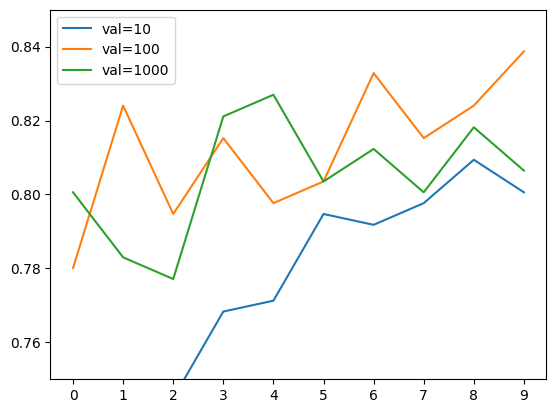

In [46]:
for size, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % size))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.ylim(0.75, 0.85)
plt.legend()

- The model with size_inner=1000 achieves the highest validation accuracy, peaking around 0.84 towards the end of training. This suggests that a larger inner layer size allows the model to learn more complex patterns and representations from the features extracted by the pre-trained base model.

- The model with size_inner=100 also performs well, with validation accuracy reaching around 0.82. While not as high as the 1000-unit model, it still shows strong performance and improvement over the 10-unit model.

- The model with size_inner=10 has the lowest validation accuracy, staying below 0.80 throughout training. This indicates that a small inner layer size may limit the model's capacity to learn and adapt to the specific characteristics of the dataset.

#### 8.9 Regularization and Dropout
Regularization and dropout are essential for improving the generalization of a model, especially in cases where different classes may share similar features (like logos). They help the model focus on learning the underlying patterns that differentiate classes rather than memorizing specific examples.

Dropout is a powerful technique for improving the generalization of neural networks by randomly deactivating neurons during training, which helps to prevent overfitting and encourages the learning of robust features.

This makes the model to focus more on the bigger picture

In [47]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet', 
        input_shape=(150, 150, 3), 
        include_top=False
    )

    base_model.trainable = False

    ##############################################################

    inputs = keras.Input(shape=(150, 150, 3))  
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)  

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    ##############################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # we dont use softamx since we use from_logits=True

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model

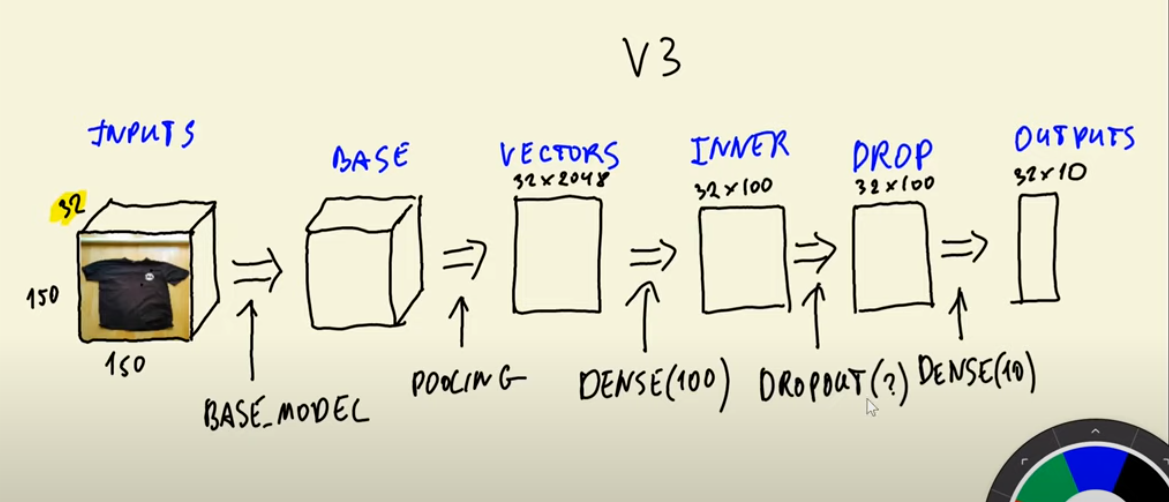

In [48]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate, 
        size_inner=size, 
        droprate=droprate
    )
    history = model.fit(train_ds, validation_data=val_ds, epochs=30)
    scores[droprate] = history.history

    print()
    print()

# because now we have added a regularization technique,
# 10 epochs are not enough to train the model.
# neural networks will require more epochs to learn something

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.5674 - loss: 1.2904 - val_accuracy: 0.7830 - val_loss: 0.6265
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8382 - loss: 0.4971 - val_accuracy: 0.8035 - val_loss: 0.5545
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8917 - loss: 0.3237 - val_accuracy: 0.8094 - val_loss: 0.5239
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9302 - loss: 0.2382 - val_accuracy: 0.8270 - val_loss: 0.5629
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9520 - loss: 0.1654 - val_accuracy: 0.7918 - val_loss: 0.5905
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9730 - loss: 0.1101 - val_accuracy: 0.8328 - val_loss: 0.5737
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9810 - loss: 0.0979 - val_accuracy: 0.8035 - val_loss: 0.6335
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9953 - loss: 0.0583 - val_accuracy: 0.821

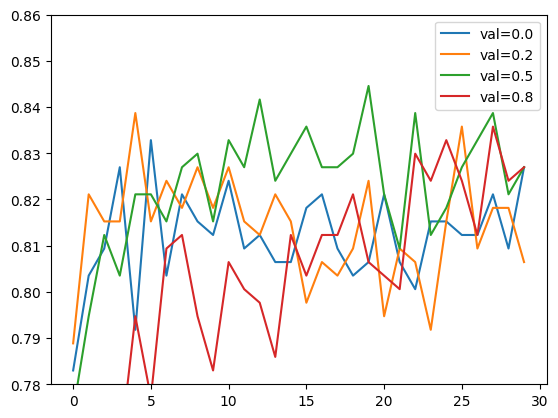

In [49]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

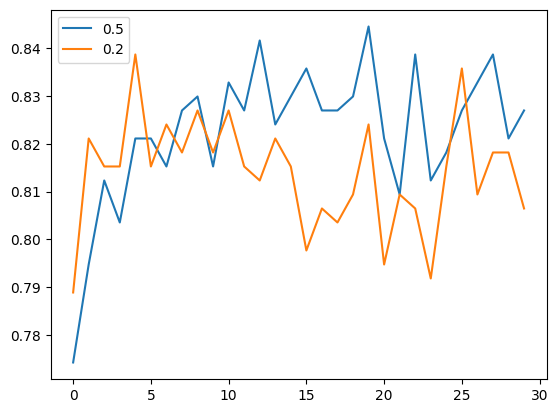

In [50]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()


#### 8.10 Data Augmentation

Data augmentation is a powerful technique that enhances the training process by increasing the diversity of the dataset, improving model generalization, and reducing the risk of overfitting. It is widely used in image classification tasks and other domains where data scarcity is a concern.

##### Choosing the right augmentation parameters
- use your own judgement
- look at the dataset, what kind of variations are there? ar the objects always centered? (rotate, shift)
- tune it as a hyperparameter (train it for 10-20 epochs if same, train for more epochs)

In [51]:
# train_gen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=30,
#     width_shift_range=10.0,
#     height_shift_range=10.0,
#     shear_range=10,
#     zoom_range=0.1
#     vertical_flip=True
# )

# best parameters
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150, 150), 
    batch_size=32
)

# In validation, we do not use data augmentation because the purpose of the validation set is to evaluate the model's performance on unseen data in a way that reflects how it will perform in real-world scenarios

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(150, 150), 
    batch_size=32,
    shuffle=False
)


Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [52]:
learning_rate = 0.001
size = 100
droprate = 0.5

model = make_model(
    learning_rate=learning_rate, 
    size_inner=size, 
    droprate=droprate
)

history = model.fit(train_ds, validation_data=val_ds, epochs=50)


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4061 - loss: 1.8104

/home/spoofiyy/ml-zoomcamp-tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.4070 - loss: 1.8076 - val_accuracy: 0.6862 - val_loss: 0.8852
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.6063 - loss: 1.1399 - val_accuracy: 0.7361 - val_loss: 0.7646
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.6600 - loss: 0.9989 - val_accuracy: 0.7625 - val_loss: 0.6693
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.6997 - loss: 0.8855 - val_accuracy: 0.7771 - val_loss: 0.6582
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.6870 - loss: 0.8960 - val_accuracy: 0.8006 - val_loss: 0.6383
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.7238 - loss: 0.7979 - val_accuracy: 0.7977 - val_loss: 0.6344
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.7388 - loss: 0.7533 - val_accuracy: 0.7918 - val_loss: 0.6194
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.7267 - loss: 0.7930 - val_accuracy: 0.794

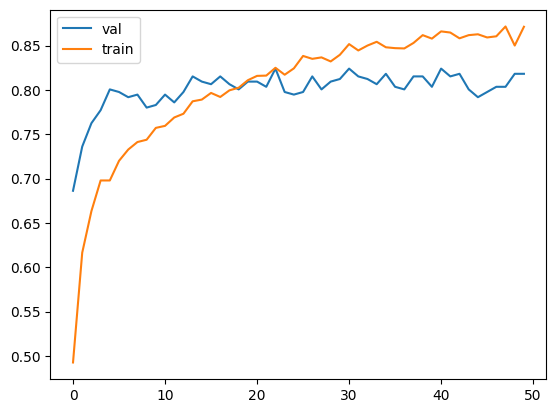

In [53]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
plt.legend()

#### 8.11 Train a Larger Model

In [54]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):

    base_model = Xception(
        weights='imagenet', 
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    ##############################################################

    inputs = keras.Input(shape=(input_size, input_size, 3))  
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)  

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    ##############################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # we dont use softamx since we use from_logits=True

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model

In [58]:
input_size = 299

In [63]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # shear_range=10,
    # zoom_range=0.1,
    # vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(input_size, input_size), 
    batch_size=32
)

# In validation, we do not use data augmentation because the purpose of the validation set is to evaluate the model's performance on unseen data in a way that reflects how it will perform in real-world scenarios

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(input_size, input_size), 
    batch_size=32,
    shuffle=False
)


Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [64]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    monitor='val_accuracy',
    mode='max'
)

In [66]:
learning_rate = 0.0005
size = 100
droprate = 0.5

model = make_model(
    learning_rate=learning_rate, 
    size_inner=size, 
    droprate=droprate,
    input_size=input_size
)

history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[checkpoint])


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 220ms/step - accuracy: 0.5137 - loss: 1.5174 - val_accuracy: 0.8065 - val_loss: 0.6167
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.7882 - loss: 0.6636 - val_accuracy: 0.8504 - val_loss: 0.4853
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.8377 - loss: 0.5101 - val_accuracy: 0.8563 - val_loss: 0.4274
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.8510 - loss: 0.4509 - val_accuracy: 0.8680 - val_loss: 0.4178
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.8710 - loss: 0.4058 - val_accuracy: 0.8768 - val_loss: 0.3925
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.8832 - loss: 0.3598 - val_accuracy: 0.8798 - val_loss: 0.3808
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.8927 - loss: 0.3359 - val_accuracy: 0.8651 - val_loss: 0.3828
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - accuracy: 0.9007 - loss: 0.3098 - val_accu

#### 8.12 Using the Model

In [68]:
model = keras.models.load_model('xception_v4_13_0.889.keras')

In [69]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test', 
    target_size=(input_size, input_size), 
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [70]:
model.evaluate(test_ds)

/home/spoofiyy/ml-zoomcamp-tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.8775 - loss: 0.3310

2024-12-07 00:49:59.020575: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1044', 36 bytes spill stores, 36 bytes spill loads

2024-12-07 00:49:59.199073: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1044', 16 bytes spill stores, 16 bytes spill loads

E0000 00:00:1733503805.473541    4868 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1733503805.590514    4868 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8818 - loss: 0.3206 


[0.26339849829673767, 0.9059139490127563]

In [72]:
path = 'clothing-dataset-small/test/pants/0dfec862-c49f-430b-a6ef-c7ceb187225e.jpg'

In [74]:
img = load_img(path, target_size=(299, 299))

In [75]:
x = np.array(img)
X = np.array([x])

In [76]:
X.shape

(1, 299, 299, 3)

In [77]:
X = preprocess_input(X)

In [79]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [82]:
classes = ['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [83]:
dict(zip(classes, pred[0]))

{'dress': np.float32(-2.1207058),
 'hat': np.float32(-5.837538),
 'longsleeve': np.float32(0.105082124),
 'outwear': np.float32(-0.74407107),
 'pants': np.float32(9.013901),
 'shirt': np.float32(-1.1806072),
 'shoes': np.float32(-5.661947),
 'shorts': np.float32(2.1498816),
 'skirt': np.float32(-3.347328),
 't-shirt': np.float32(-3.6639407)}

In [85]:
probabilities = tf.nn.softmax(pred[0])  # Convert logits to probabilities

# Get the index of the class with the highest probability
predicted_class_index = tf.argmax(probabilities).numpy()

# Create a binary result array
binary_result = np.zeros_like(probabilities)
binary_result[predicted_class_index] = 1

# Map the binary result to class names
binary_class_result = {k: float(v) for k, v in binary_class_result.items()}

binary_class_result

{'dress': 0.0,
 'hat': 0.0,
 'longsleeve': 0.0,
 'outwear': 0.0,
 'pants': 1.0,
 'shirt': 0.0,
 'shoes': 0.0,
 'shorts': 0.0,
 'skirt': 0.0,
 't-shirt': 0.0}

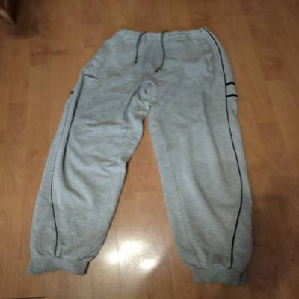

In [86]:
img